In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Set the style for plots
sns.set(style='whitegrid')

In [15]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\unsupervised_ibm_project\data.csv")

data.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0


In [16]:
data['conversion'].value_counts()

conversion
0    54606
1     9394
Name: count, dtype: int64

In [17]:
data.shape

(64000, 9)

- recency - months since last purchase
- history - $value of the historical purchases
- used_discount - indicates if the customer used a discount before
- used_bogo - indicates if the customer used a buy one get one before
- zip_code - class of the zip code as Suburban/Urban/Rural
- is_referral - indicates if the customer was acquired from referral channel
- channel - channels that the customer using, Phone/Web/Multichannel
- offer - the offers sent to the customers, Discount/But One Get One/No Offer
- conversion - customer conversion(buy or not)

### Data Exploration and Cleaning 

- Output shows we have no missing data 

In [18]:
# Check for missing values
print("Missing values in the dataset:")
print(data.isnull().sum())

Missing values in the dataset:
recency          0
history          0
used_discount    0
used_bogo        0
zip_code         0
is_referral      0
channel          0
offer            0
conversion       0
dtype: int64


In [19]:
# Summary statistics
data.describe()

,recency,history,used_discount,used_bogo,is_referral,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,5.763734,242.085656,0.551031,0.549719,0.502250,0.146781
std,3.507592,256.158608,0.497393,0.497526,0.499999,0.353890
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,64.660000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,158.110000,1.000000,1.000000,1.000000,0.000000
75%,9.000000,325.657500,1.000000,1.000000,1.000000,0.000000
max,12.000000,3345.930000,1.000000,1.000000,1.000000,1.000000


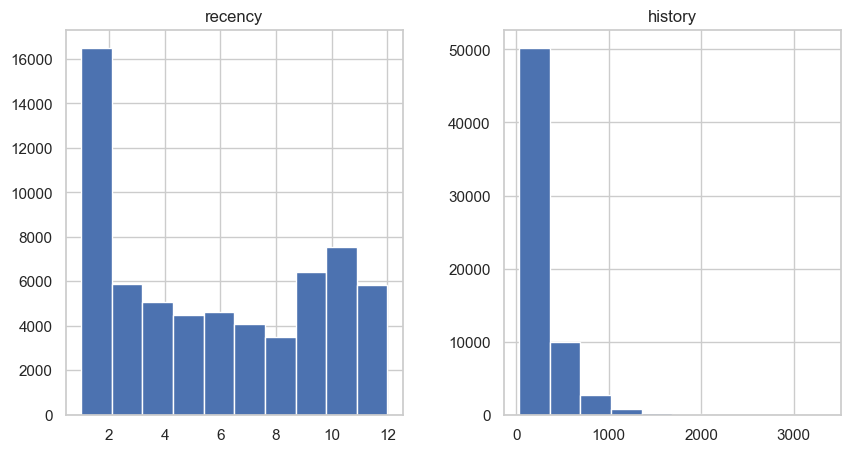

In [20]:
# Distribution of numerical features
numerical_features = ['recency', 'history']
data[numerical_features].hist(figsize=(10, 5))
plt.show()

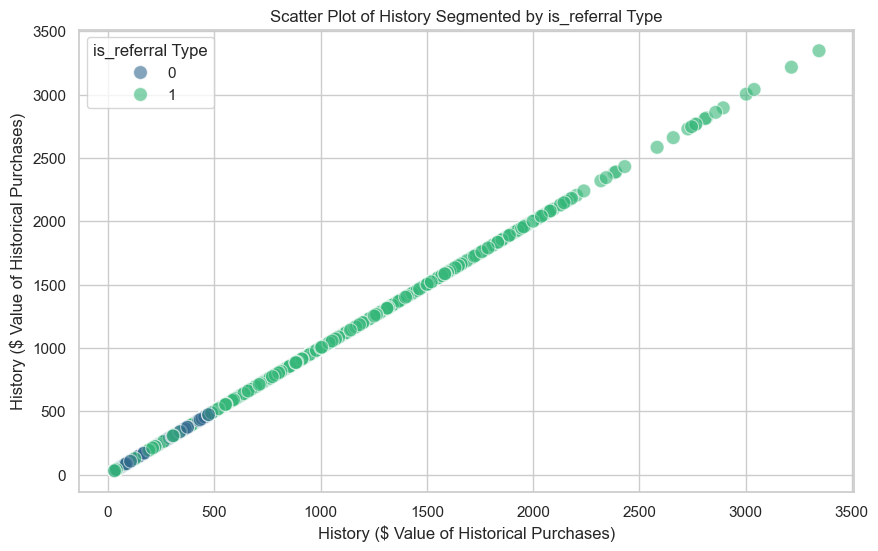

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot 'history' against itself, with colors based on 'is_referral'
sns.scatterplot(x='history', y='history', hue='is_referral', data=data, palette='viridis', s=100, alpha=0.6)

# Add titles and labels
plt.title('Scatter Plot of History Segmented by is_referral Type')
plt.xlabel('History ($ Value of Historical Purchases)')
plt.ylabel('History ($ Value of Historical Purchases)')
plt.legend(title='is_referral Type')
plt.show()


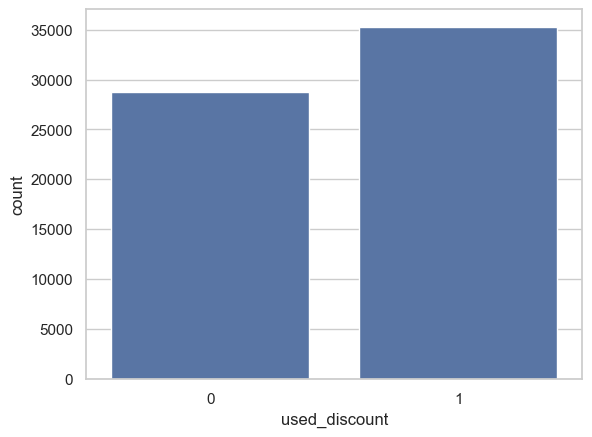

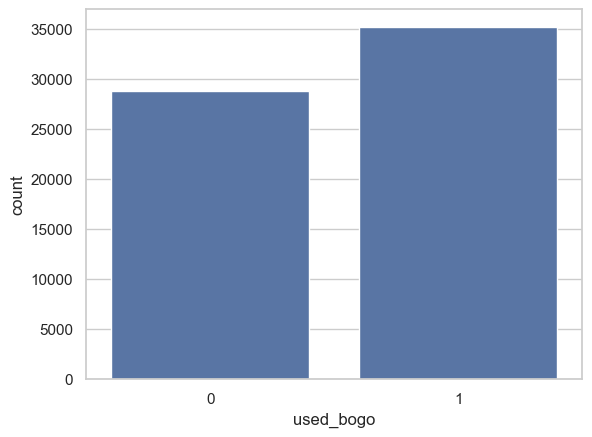

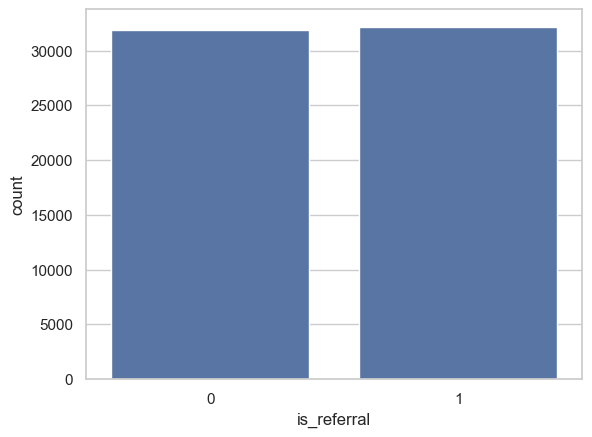

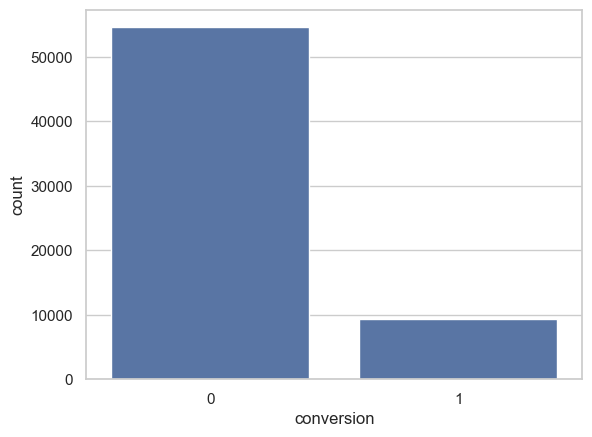

In [22]:
# Distribution of categorical features
categorical_features = ['used_discount', 'used_bogo', 'is_referral', 'conversion']
for feature in categorical_features:
    sns.countplot(x=feature, data=data)
    plt.show()

In [23]:
data.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0


### Feature Engineering 

In [24]:
categorical_features = [ 'zip_code', 'channel', 'offer', ]

In [25]:
# One-Hot Encode categorical variables
encoder = OneHotEncoder()
encoded_features = pd.DataFrame(encoder.fit_transform(data[categorical_features]).toarray(),
                                columns=encoder.get_feature_names_out(categorical_features))

In [26]:
# Combine the encoded features with the numerical ones
numerical_features = data[['recency', 'history', 'used_discount', 'used_bogo', 'is_referral', 'conversion']]
encoded_features = pd.concat([numerical_features.reset_index(drop=True), encoded_features], axis=1)

In [27]:
numerical_cols = numerical_features.columns 

numerical_cols = numerical_cols[:-1]

In [28]:
data[numerical_cols]

,recency,history,used_discount,used_bogo,is_referral
0,10,142.44,1,0,0
1,6,329.08,1,1,1
2,7,180.65,0,1,1
3,9,675.83,1,0,1
4,2,45.34,1,0,0
...,...,...,...,...,...
63995,10,105.54,1,0,0
63996,5,38.91,0,1,1
63997,6,29.99,1,0,1
63998,1,552.94,1,0,1


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


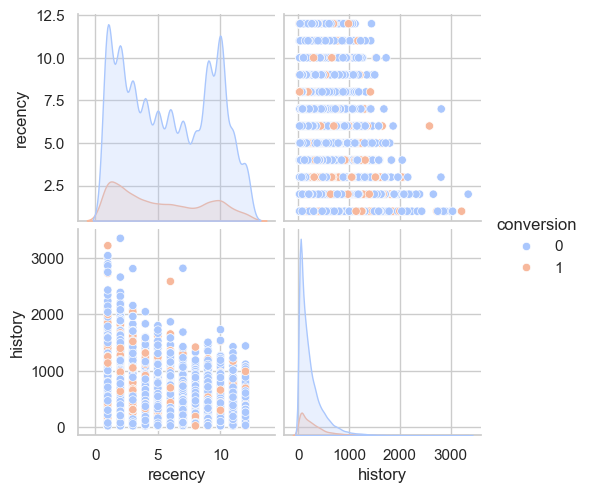

In [29]:
import seaborn as sns

# Assuming numerical_cols contains the relevant numerical columns
numerical_cols = ['recency', 'history']

# Plot the pairplot with conversion as the hue
sns.set_context('notebook')
sns.pairplot(data[numerical_cols + ['conversion']], 
             hue='conversion', 
             palette='coolwarm')

plt.show()

In [30]:
encoded_features

,recency,history,used_discount,used_bogo,is_referral,conversion,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,offer_Buy One Get One,offer_Discount,offer_No Offer
0,10,142.44,1,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,6,329.08,1,1,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,7,180.65,0,1,1,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,9,675.83,1,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2,45.34,1,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
63996,5,38.91,0,1,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
63997,6,29.99,1,0,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
63998,1,552.94,1,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


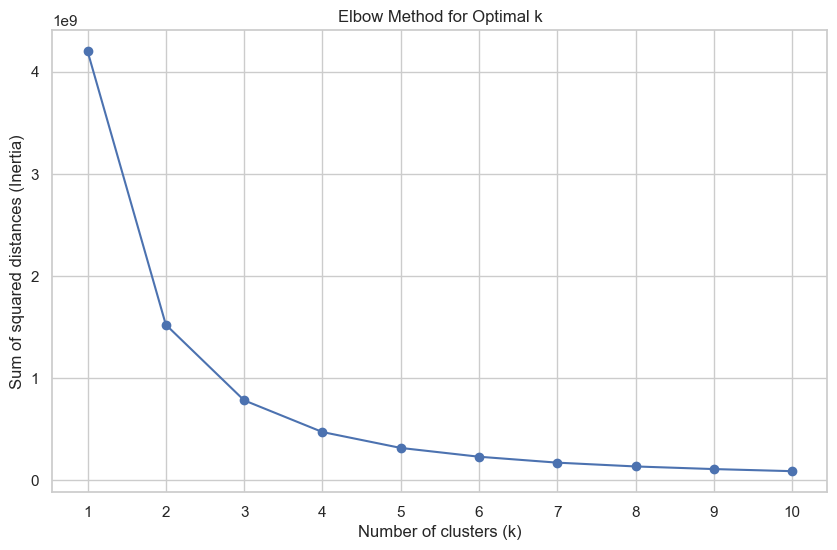

In [33]:
# Find the optimal number of clusters using the Elbow Method
sse = []  # Sum of squared distances from each point to its assigned cluster center

# Testing different k values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42)
    kmeans.fit(encoded_features)
    sse.append(kmeans.inertia_)  # Inertia: Sum of squared distances to closest cluster center

# Plot the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (Inertia)')
plt.xticks(range(1, 11))
plt.show()

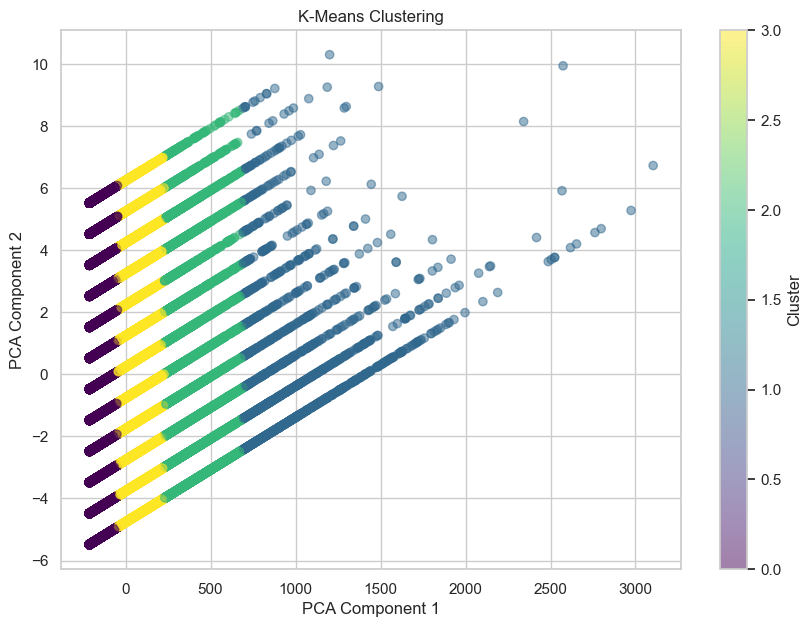

In [17]:
# Apply PCA for dimensionality reduction (to 2 components)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(encoded_features)

# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_clusters = kmeans.fit_predict(encoded_features)

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_clusters, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [53]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clusters = agg_clustering.fit_predict(encoded_features)

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=agg_clusters, cmap='plasma', alpha=0.5)
plt.title('Agglomerative Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


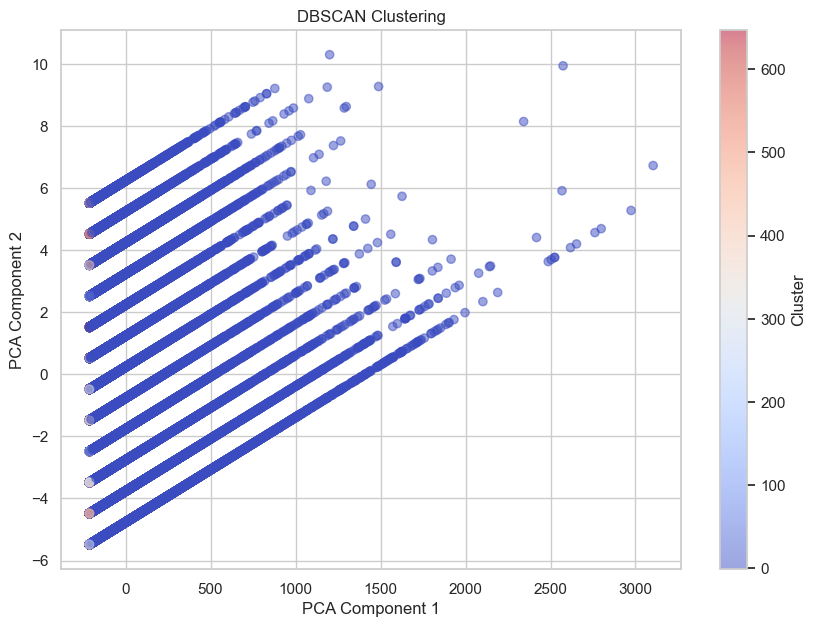

In [18]:
from sklearn.cluster import DBSCAN

# DBSCAN Clustering

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(encoded_features)

# Plot the clusters (DBSCAN might label noise as -1, which you can handle in the plot)
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=dbscan_clusters, cmap='coolwarm', alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
